In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from siuba import _, select, rename, mutate, group_by, arrange, filter, summarize, distinct, left_join

In [3]:
df = pd.read_csv('cleaned_data/census_demographics.csv')

In [4]:
df_health = pd.read_csv('cleaned_data/asthma_clean_file.csv')

In [5]:
df_complete = pd.read_csv('cleaned_data/complete_merged_table.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   County                             58 non-null     object 
 1   TotalPopulation                    58 non-null     int64  
 2   TotalWhiteNotHispanic              58 non-null     int64  
 3   TotalBlack                         58 non-null     int64  
 4   TotalAsian                         58 non-null     int64  
 5   TotalHispanicLatino                58 non-null     int64  
 6   MedianIncome                       58 non-null     int64  
 7   MedianIncomeForeignBorn            57 non-null     float64
 8   TotalBelowPovertyLine              58 non-null     int64  
 9   TotalForeignBornBelowPoveryLine    58 non-null     int64  
 10  TotalHSDiploma                     58 non-null     int64  
 11  TotalBachelorsDegree               58 non-null     int64  
 

In [7]:
df.describe()

,TotalPopulation,TotalWhiteNotHispanic,TotalBlack,TotalAsian,TotalHispanicLatino,MedianIncome,MedianIncomeForeignBorn,TotalBelowPovertyLine,TotalForeignBornBelowPoveryLine,TotalHSDiploma,...,TotalPop16Above,TotalPop16AboveInLaborForce,TotalPop16AboveNotInLaborForce,TotalPopSurveyInsurance,TotalEmployedWithInsurance,TotalEmployedWithInsurancePrivate,TotalEmployedWithInsurancePublic,TotalEmployedNoInsurance,TotalUnemployedNoInsurance,TotalNotInLaborForceNoInsurance
count,5.800000e+01,5.800000e+01,58.000000,5.800000e+01,5.800000e+01,58.000000,57.000000,5.800000e+01,58.000000,5.800000e+01,...,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,6.773017e+05,2.518157e+05,39208.758621,9.814522e+04,2.642705e+05,30963.620690,27131.947368,8.878866e+04,26633.396552,8.298707e+04,...,5.393908e+05,3.434749e+05,1.959159e+05,6.687472e+05,2.700205e+05,2.310899e+05,45866.758621,29411.465517,3453.982759,10981.706897
std,1.469524e+06,4.362806e+05,114855.088637,2.389240e+05,6.845517e+05,7354.083205,6564.357945,2.079402e+05,75887.363799,1.862458e+05,...,1.180864e+06,7.653985e+05,4.162612e+05,1.457003e+06,5.940364e+05,5.013539e+05,108132.041837,81429.673384,8575.534364,28847.141339
min,1.039000e+03,5.510000e+02,2.000000,0.000000e+00,1.300000e+02,18245.000000,11324.000000,2.050000e+02,0.000000,1.730000e+02,...,8.530000e+02,3.920000e+02,4.610000e+02,1.039000e+03,2.330000e+02,1.900000e+02,68.000000,38.000000,8.000000,38.000000
25%,4.764675e+04,3.079650e+04,644.750000,7.717500e+02,9.949750e+03,25765.500000,23380.000000,5.471000e+03,548.750000,8.501250e+03,...,4.058400e+04,1.936000e+04,1.901325e+04,4.657675e+04,1.507150e+04,1.280825e+04,3084.250000,1487.000000,247.000000,691.750000
50%,1.846320e+05,1.012650e+05,3975.000000,1.036400e+04,5.075650e+04,29496.500000,26197.000000,2.934800e+04,4254.000000,2.147500e+04,...,1.501525e+05,8.436300e+04,6.578950e+04,1.825205e+05,6.652900e+04,5.971300e+04,13602.500000,6234.000000,778.000000,2623.500000
75%,6.927508e+05,2.872638e+05,17474.750000,5.716750e+04,2.535352e+05,33250.000000,30499.000000,7.972250e+04,20836.500000,7.332025e+04,...,5.250925e+05,3.220018e+05,1.862992e+05,6.844030e+05,2.540648e+05,2.105365e+05,44803.750000,22948.000000,3036.000000,8466.750000
max,1.008157e+07,2.641770e+06,820478.000000,1.473221e+06,4.888434e+06,52866.000000,48852.000000,1.480446e+06,553580.000000,1.296682e+06,...,8.123894e+06,5.253694e+06,2.870200e+06,1.001290e+07,4.049389e+06,3.366147e+06,769892.000000,588450.000000,60308.000000,205209.000000


In [8]:
df = (df
  >> mutate(
      WhitePerc = _.TotalWhiteNotHispanic/_.TotalPopulation,
      PovertyPerc = _.TotalBelowPovertyLine/_.TotalPop16Above,
      CollegePerc = _.TotalBachelorsDegree/_.TotalPop16Above,
      TotalUninsured = _.TotalEmployedNoInsurance + _.TotalUnemployedNoInsurance + _.TotalNotInLaborForceNoInsurance,
      UninsuredPerc = _.TotalUninsured/_.TotalPopulation
      )
  )

In [9]:
df_health = (df_health
  >> filter(_.Year == 2019, _.Category == "Total Population", _.Age == "18 and Over")
  >> rename(County = "Geography")
  >> left_join(_, df, on = "County")
  >> filter(_.TotalPopulation > 0)
  )

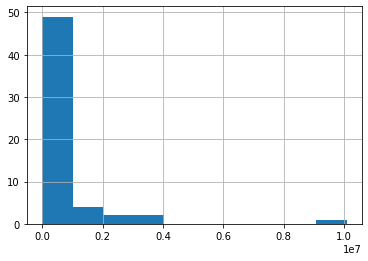

In [10]:
_ = df.TotalPopulation.hist()

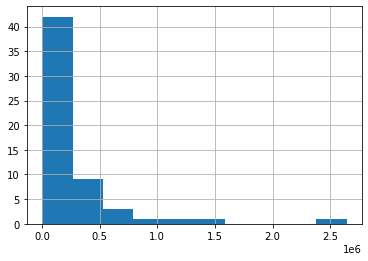

In [11]:
_ = df.TotalWhiteNotHispanic.hist()

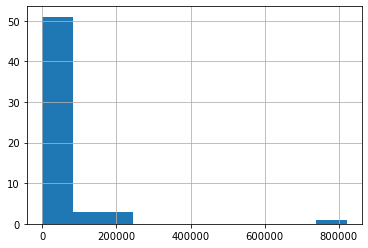

In [12]:
_ = df.TotalBlack.hist()

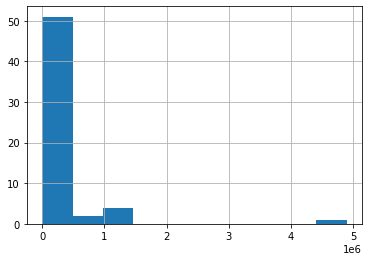

In [13]:
_ = df.TotalHispanicLatino.hist()

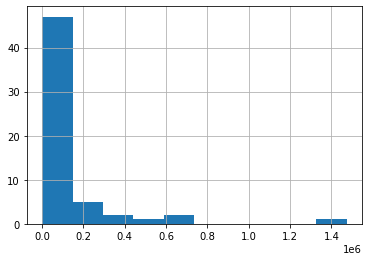

In [14]:
_ = df.TotalAsian.hist()

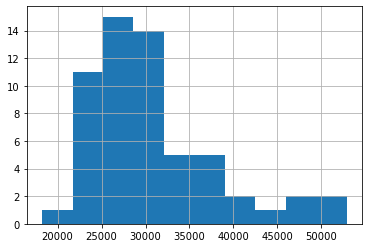

In [15]:
_ = df.MedianIncome.hist()

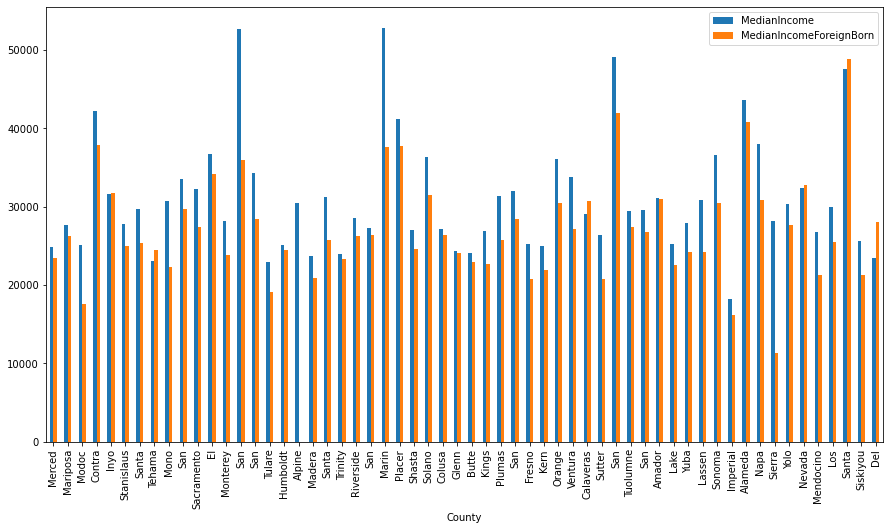

In [16]:
_ = df.plot(x="County", y=["MedianIncome", "MedianIncomeForeignBorn"], kind="bar", figsize = [15,8])

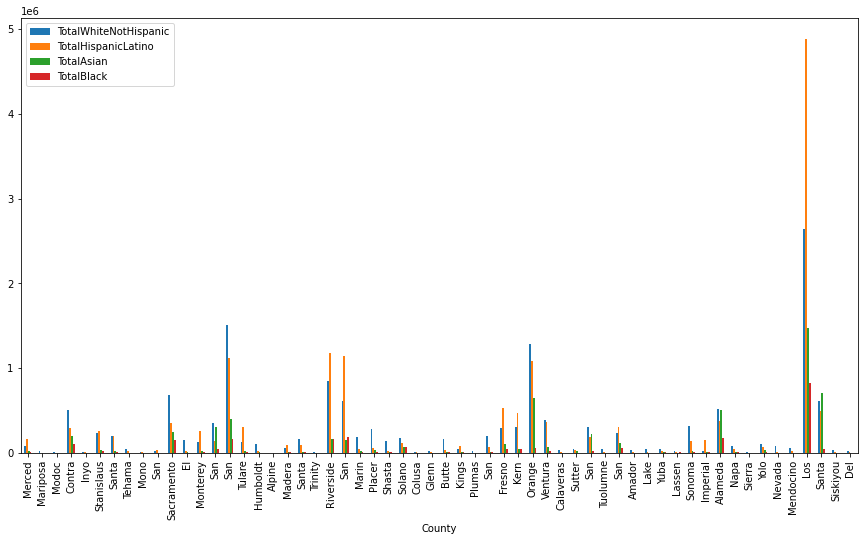

In [17]:
_ = df.plot(x="County", y=["TotalWhiteNotHispanic","TotalHispanicLatino","TotalAsian","TotalBlack"], kind="bar", figsize = [15,8])

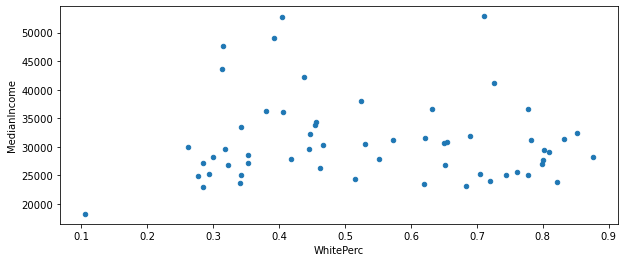

In [18]:
_ = df.plot(x="WhitePerc",y="MedianIncome",kind="scatter", figsize = (10,4))

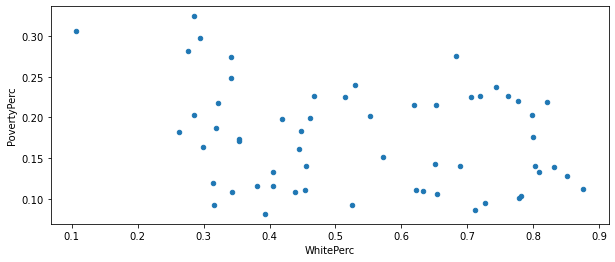

In [19]:
_ = df.plot(x="WhitePerc",y="PovertyPerc",kind="scatter", figsize = (10,4))

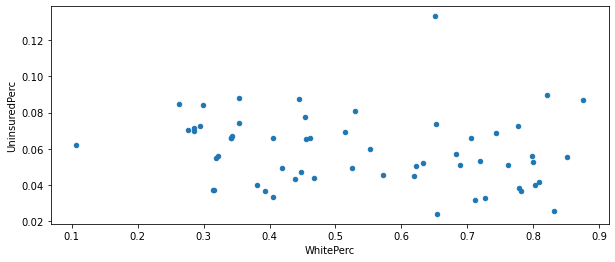

In [20]:
_ = df.plot(x="WhitePerc",y="UninsuredPerc",kind="scatter", figsize = (10,4))

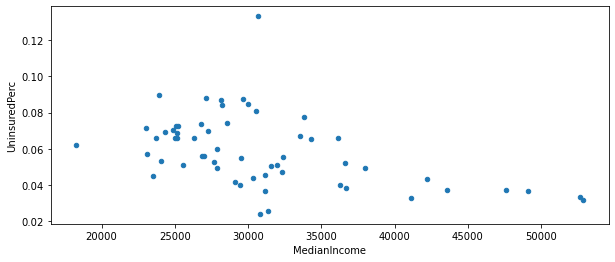

In [21]:
_ = df.plot(x="MedianIncome",y="UninsuredPerc",kind="scatter", figsize = (10,4))

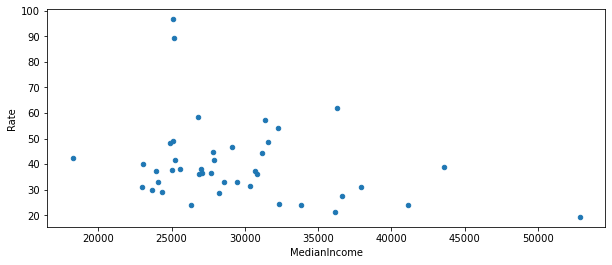

In [22]:
_ = df_health.plot(x="MedianIncome",y="Rate",kind="scatter", figsize = (10,4))

In [23]:
df_health

,Year,County,Age,Category,Demographic,Count,Rate,TotalPopulation,TotalWhiteNotHispanic,TotalBlack,...,TotalEmployedWithInsurancePublic,TotalEmployedNoInsurance,TotalUnemployedNoInsurance,TotalNotInLaborForceNoInsurance,FullCounty,WhitePerc,PovertyPerc,CollegePerc,TotalUninsured,UninsuredPerc
0,2019,Alameda,18 and Over,Total Population,18 and Over,5130,38.9,1656754.0,520447.0,175751.0,...,93092.0,41252.0,4564.0,16196.0,Alameda County,0.314137,0.119783,0.237459,62012.0,0.037430
1,2019,Amador,18 and Over,Total Population,18 and Over,126,44.3,38429.0,30035.0,904.0,...,1880.0,948.0,209.0,257.0,Amador County,0.781571,0.103624,0.119479,1414.0,0.036795
2,2019,Butte,18 and Over,Total Population,18 and Over,557,33.0,225817.0,162537.0,3461.0,...,18455.0,7285.0,1287.0,3460.0,Butte County,0.719773,0.226176,0.142892,12032.0,0.053282
3,2019,Calaveras,18 and Over,Total Population,18 and Over,135,46.5,45514.0,36837.0,315.0,...,2301.0,850.0,298.0,757.0,Calaveras County,0.809355,0.132696,0.109828,1905.0,0.041855
4,2019,Colusa,18 and Over,Total Population,18 and Over,61,36.5,21454.0,7576.0,327.0,...,1653.0,1311.0,105.0,472.0,Colusa County,0.353128,0.170676,0.093706,1888.0,0.088002
8,2019,Fresno,18 and Over,Total Population,18 and Over,3006,41.4,984521.0,289650.0,46782.0,...,88996.0,45502.0,6387.0,19368.0,Fresno County,0.294204,0.297834,0.115678,71257.0,0.072377
9,2019,Glenn,18 and Over,Total Population,18 and Over,67,29.2,27976.0,14398.0,230.0,...,2472.0,1163.0,171.0,606.0,Glenn County,0.514655,0.225067,0.091746,1940.0,0.069345
10,2019,Humboldt,18 and Over,Total Population,18 and Over,485,48.9,135940.0,101078.0,1506.0,...,13438.0,5670.0,1095.0,2588.0,Humboldt County,0.743549,0.237239,0.166719,9353.0,0.068802
11,2019,Imperial,18 and Over,Total Population,18 and Over,577,42.3,180701.0,19228.0,4489.0,...,15511.0,6032.0,1960.0,3245.0,Imperial County,0.106408,0.306045,0.087241,11237.0,0.062186
12,2019,Inyo,18 and Over,Total Population,18 and Over,59,48.7,17977.0,11173.0,153.0,...,996.0,712.0,37.0,155.0,Inyo County,0.621516,0.110847,0.149220,904.0,0.050286


In [29]:
df_corr = (df_health
  >> select(_.WhitePerc, _.PovertyPerc, _.CollegePerc,_.UninsuredPerc,_.MedianIncome, _.Rate, _.Count)
  )

corr = df_corr.corr()

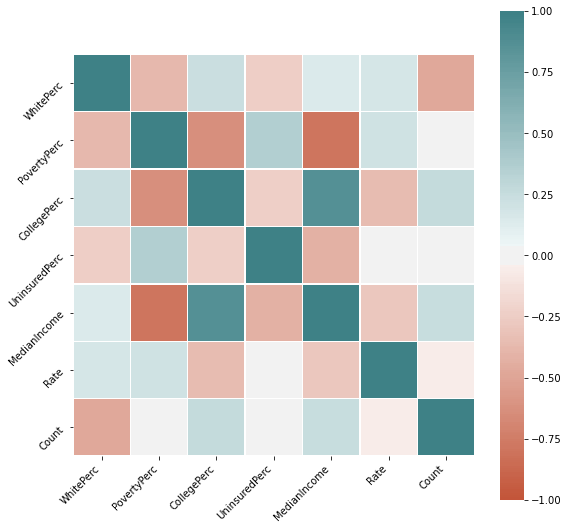

In [30]:
ax = plt.subplots(figsize=(9, 9))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,200,n=200),
    square=True,
    linewidths=.5,
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [ ]:
df_complete

In [ ]:
df_subset = (df_complete 
  >> filter(_.Year == 2017)
  )

In [34]:
df_complete

,County,Year,Total_Population,Median_Income,White_Perc,Poverty_Perc,Uninsured_Perc,Asthma_Incidents,Asthma_Rate,Acres_Burned,Duration,Wildfire_Count,AQ_Min,AQ_Max,AQ_Mean,AQ_Median
0,Alameda,2011,1656754.0,43583.0,0.314137,0.097529,0.037430,6706,56.6,0.0,0,0.0,NaN,NaN,NaN,NaN
1,Alameda,2012,1656754.0,43583.0,0.314137,0.097529,0.037430,6965,58.4,0.0,0,0.0,NaN,NaN,NaN,NaN
2,Alameda,2013,1656754.0,43583.0,0.314137,0.097529,0.037430,6705,55.0,478.0,0,4.0,0.0,119.0,40.067273,38.0
3,Alameda,2014,1656754.0,43583.0,0.314137,0.097529,0.037430,6332,51.6,0.0,0,0.0,0.0,119.0,33.979899,31.0
4,Alameda,2015,1656754.0,43583.0,0.314137,0.097529,0.037430,6513,53.1,3340.0,5,5.0,0.0,124.0,36.424754,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Yuba,2015,76360.0,27877.0,0.551925,0.151545,0.060071,215,39.5,188.0,6,2.0,NaN,NaN,NaN,NaN
375,Yuba,2016,76360.0,27877.0,0.551925,0.151545,0.060071,202,37.7,400.0,0,1.0,NaN,NaN,NaN,NaN
376,Yuba,2017,76360.0,27877.0,0.551925,0.151545,0.060071,245,45.1,10981.0,950,6.0,NaN,NaN,NaN,NaN
377,Yuba,2018,76360.0,27877.0,0.551925,0.151545,0.060071,227,40.8,0.0,0,0.0,NaN,NaN,NaN,NaN


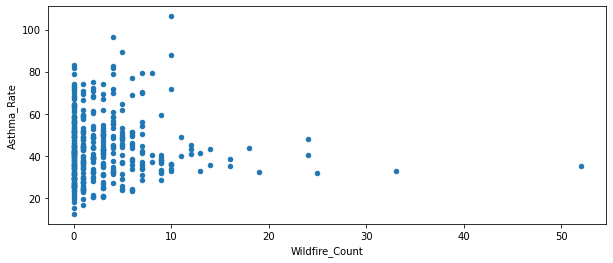

In [40]:
_ = df_complete.plot(x="Wildfire_Count",y="Asthma_Rate",kind="scatter", figsize = (10,4))

In [45]:
df_corr2 = (df_complete
  >> select(_.White_Perc, _.Poverty_Perc,_.Uninsured_Perc,_.Median_Income, _.Asthma_Rate, _.Asthma_Incidents, _.Wildfire_Count, _.Duration, _.Acres_Burned, _.AQ_Mean, _.AQ_Max)
  )

corr2 = df_corr2.corr()

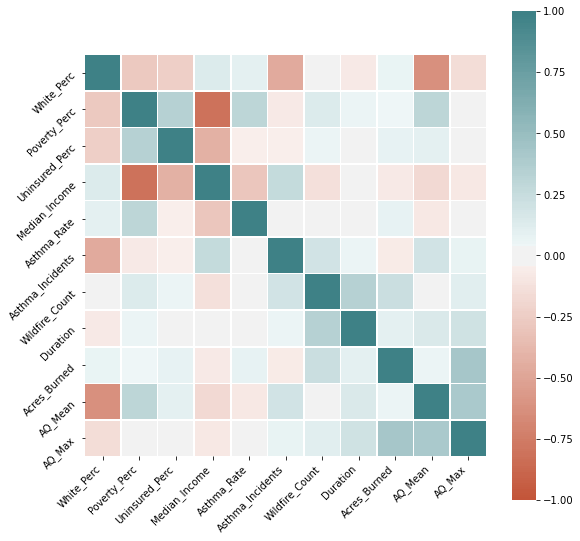

In [46]:
ax = plt.subplots(figsize=(9, 9))

ax = sns.heatmap(
    corr2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,200,n=200),
    square=True,
    linewidths=.5,
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right'
);



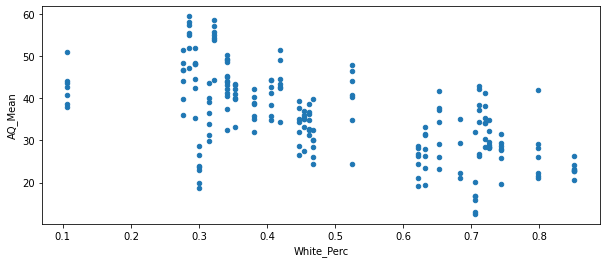

In [47]:
_ = df_complete.plot(x="White_Perc",y="AQ_Mean",kind="scatter", figsize = (10,4))

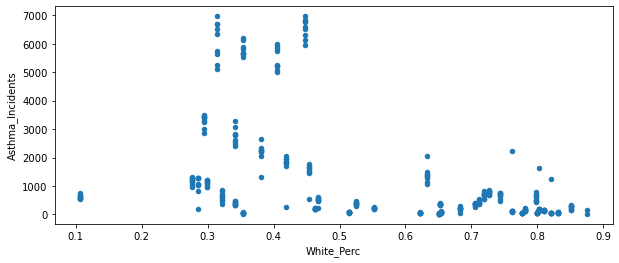

In [48]:
_ = df_complete.plot(x="White_Perc",y="Asthma_Incidents",kind="scatter", figsize = (10,4))

In [49]:
import statsmodels.formula.api as sm

In [62]:
formula = 'Asthma_Rate ~ White_Perc + Median_Income + AQ_Mean + Year'
model = sm.ols(formula = formula, data = df_complete)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Asthma_Rate   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     9.791
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.08e-07
Time:                        16:08:24   Log-Likelihood:                -808.63
No. Observations:                 200   AIC:                             1627.
Df Residuals:                     195   BIC:                             1644.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2818.6964   1009.531      2.792      0.006     827.695    4809.698
White_Perc        2.2216      6.801      0.327      0.744     -11.192      15.635
Median_Income    -0.0008      0.000     -5.496      0.000      -0.001      -0.001
AQ_Mean          -0.2299      0.128     -1.801      0.073      -0.482       0.022
Year             -1.3616      0.500     -2.722      0.007      -2.348      -0.375
==============================================================================
Omnibus:                       25.276   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.891
Skew:                           0.943   Prob(JB):                     1.96e-07
Kurtosis:                       3.391   Cond. No.                     3.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""